# EDA project

In [60]:
import pandas as pd
import folium as folium
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as mse

# Geners in record companies 2

#### Project group: 
- Ariel Koren
- Hila Trabelsi
- Tzuf Saadi
- Hadar Mizrachi
- קישור לקובץ הנתונים:
https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset 

#### In this data we will produce wich genre is the most worthy to the company to assign artist from this genre.

<img src= "https://th.bing.com/th/id/R.2997b9b4f06b8f2b56c0574cdfe9b1a4?rik=UeoULjD6mBmojA&riu=http%3a%2f%2forig12.deviantart.net%2f460e%2ff%2f2014%2f088%2f4%2f6%2fhollywood_records_logo_by_lulamiller-d7c3fos.png&ehk=Y9FePgUueWIBAODgGDdiRzWO9PzIWDjJJpUwJHnamY8%3d&risl=&pid=ImgRaw&r=0&sres=1&sresct=1" width="400"/>

In [61]:
urlartist = "https://raw.githubusercontent.com/arielk318/new-project/main/artists.csv"

In [62]:
urlalbums = "https://raw.githubusercontent.com/arielk318/new-project/main/albums.csv"

In [66]:
albums_df = pd.read_csv(urlalbums)

In [67]:
albums_df

,id,artist_id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006,11,905193,4.0,1.5,3.0
1,2,23548,Down Mare,Metal,2014,7,969122,3.0,4.0,5.0
2,3,17822,Embarrassed Hungry,Latino,2000,11,522095,2.5,1.0,2.0
3,4,19565,Standard Immediate Engineer Slovakia,Pop,2017,4,610116,1.5,2.0,4.0
4,5,24941,Decent Distance Georgian,Black Metal,2010,8,151111,4.5,2.5,1.0
...,...,...,...,...,...,...,...,...,...,...
99995,99996,44624,Mike Pies Malay Albanian Terrible,Pop-Rock,2016,3,871655,2.5,1.5,1.0
99996,99997,16345,Global,Retro,2013,14,146202,5.0,2.5,1.0
99997,99998,32674,MINI,Indie,2018,4,620452,2.0,4.0,5.0
99998,99999,10134,Marketing Belligerent Toe,Pop,2007,7,643276,4.0,1.5,4.0


#### The data focused on the years bellow:

In [40]:
albums_df.year_of_pub.unique()

array([2006, 2014, 2000, 2017, 2010, 2018, 2005, 2008, 2002, 2009, 2001,
       2013, 2003, 2015, 2016, 2011, 2012, 2019, 2007, 2004], dtype=int64)

#### Is there a null values in the data?

In [41]:
albums_df.isnull().values.any()

False

#### The types of the columns are:

In [42]:
albums_df.dtypes

id                        int64
artist_id                 int64
album_title              object
genre                    object
year_of_pub               int64
num_of_tracks             int64
num_of_sales              int64
rolling_stone_critic    float64
mtv_critic              float64
music_maniac_critic     float64
dtype: object

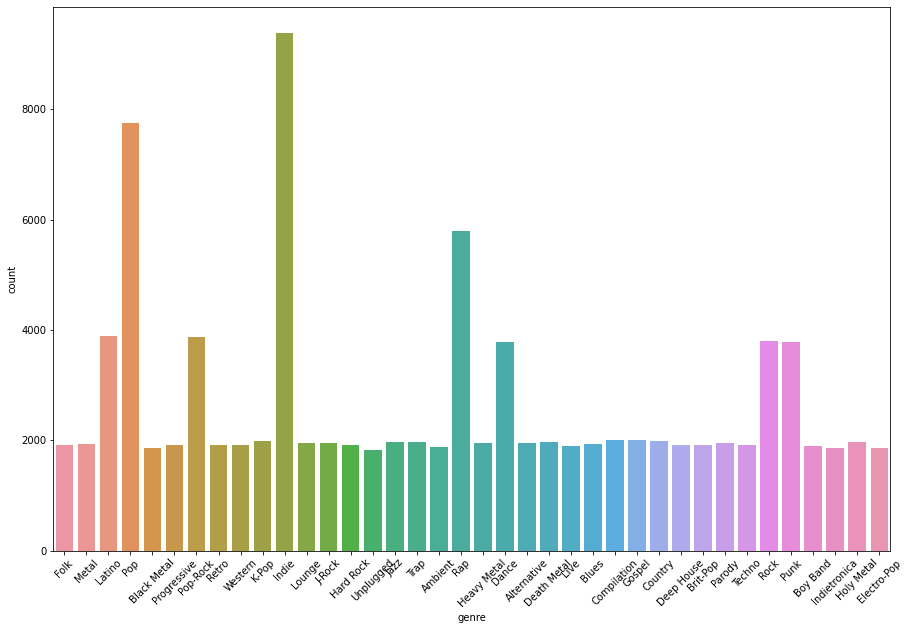

In [43]:
plt.figure(figsize=(15,10))
st = sns.countplot(x='genre', data=albums_df)
st.tick_params(axis='x', rotation=45)

#### As you can see from the countplot, most of the albums cataloged in the next genres: 

- Indie
- Pop
- Rap
- Latino 
- Rock
- Pop-Rock
- Punk

In [44]:
genre = albums_df[['genre']]

In [45]:
genre.value_counts()

genre       
Indie           9384
Pop             7755
Rap             5788
Latino          3898
Pop-Rock        3880
Rock            3804
Punk            3787
Dance           3775
Gospel          2008
Compilation     2003
Country         1993
K-Pop           1986
Holy Metal      1979
Trap            1977
Jazz            1975
Death Metal     1968
Lounge          1958
Parody          1957
J-Rock          1957
Heavy Metal     1953
Alternative     1947
Metal           1934
Blues           1928
Retro           1924
Brit-Pop        1921
Western         1920
Hard Rock       1919
Progressive     1916
Folk            1912
Techno          1910
Deep House      1909
Live            1905
Boy Band        1894
Ambient         1874
Black Metal     1860
Indietronica    1858
Electro-Pop     1855
Unplugged       1829
dtype: int64

#### First we will try to see the conection between the critic channels, and the sum of sales:

In [46]:
group = albums_df.pivot_table(['mtv_critic', 'music_maniac_critic', 'rolling_stone_critic'],'num_of_sales').reset_index()

In [47]:
group

,num_of_sales,mtv_critic,music_maniac_critic,rolling_stone_critic
0,1009,2.5,2.75,2.5
1,1011,3.5,2.00,3.5
2,1015,2.0,5.00,2.5
3,1034,2.0,1.50,4.5
4,1042,1.0,4.00,1.0
...,...,...,...,...
95157,999969,4.0,5.00,3.0
95158,999976,1.5,5.00,5.0
95159,999977,1.5,4.50,1.5
95160,999991,2.5,2.00,4.5


<img src= 'https://play-lh.googleusercontent.com/ToohFdJJ016UxyObeFjWkB6wtp3_M-DiSaPvCJqV19kU_k0mGZ7SJPKrodbNJw4KGT4' width="100"/>

In [57]:
group.groupby(['rolling_stone_critic']).mean().sort_values(by = 'num_of_sales')

,num_of_sales,mtv_critic,music_maniac_critic
rolling_stone_critic,,,
1.875000,67186.000000,3.125000,2.000000
3.833333,308284.000000,2.791667,2.166667
0.833333,351413.500000,2.416667,2.666667
2.333333,384926.875000,2.770833,2.687500
4.166667,427780.000000,2.916667,3.833333
1.666667,431827.800000,2.633333,2.366667
3.166667,444315.500000,2.722222,2.944444
1.166667,447200.333333,2.944444,3.000000
4.750000,482454.182692,2.740385,2.711538


<img src=  "https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/MTV-Logo.svg/1280px-MTV-Logo.svg.png" width="100"/>

In [49]:
group.groupby(['mtv_critic']).mean().sort_values(by = 'num_of_sales')

,num_of_sales,music_maniac_critic,rolling_stone_critic
mtv_critic,,,
3.125000,67186.000000,2.000000,1.875000
4.166667,111358.333333,2.666667,2.555556
2.625000,346507.000000,3.375000,3.750000
2.333333,393166.500000,2.812500,2.895833
3.833333,422405.625000,2.333333,2.875000
1.666667,428447.285714,2.476190,2.833333
3.333333,449546.142857,2.690476,2.809524
1.750000,487702.368966,2.693966,2.765517
4.750000,488462.280374,2.862150,2.834112


<img src= "https://i1.sndcdn.com/avatars-k5XGaQFKCsyNNynl-kUTk6A-t500x500.jpg" width="100"/>

In [50]:
group.groupby(['music_maniac_critic']).mean().sort_values(by = 'num_of_sales')

,num_of_sales,mtv_critic,rolling_stone_critic
music_maniac_critic,,,
3.666667,156233.000000,3.722222,2.555556
1.166667,257684.000000,3.416667,3.666667
3.375000,346507.000000,2.625000,3.750000
1.833333,367694.333333,2.759259,2.870370
4.166667,374394.666667,3.222222,2.111111
3.833333,375581.000000,3.083333,3.208333
2.166667,444311.000000,2.708333,2.208333
4.250000,467900.812121,2.840909,2.774242
3.166667,477427.333333,2.500000,2.416667


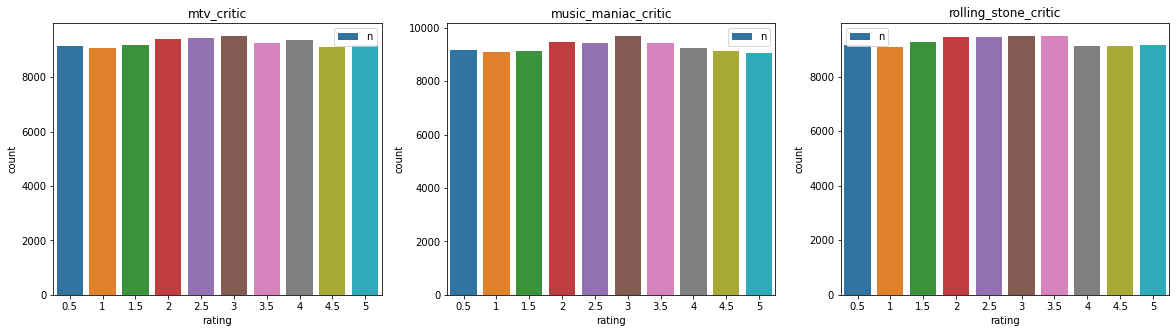

In [59]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
mtv = sns.countplot(ax = axes[0],data = group,x= 'mtv_critic',order = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
music_maniac = sns.countplot(ax = axes[1],data = group,x= 'music_maniac_critic',order = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
rolling_stone = sns.countplot(ax = axes[2],data = group,x= 'rolling_stone_critic',order = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
mtv.legend(labels = 'num_of_sales')
music_maniac.legend(labels = 'num_of_sales')
rolling_stone.legend(labels = 'num_of_sales')
ax = axes[0].set_title("mtv_critic")
ax = axes[1].set_title("music_maniac_critic")
ax = axes[2].set_title("rolling_stone_critic")
axes[0].set_xlabel("rating")
axes[1].set_xlabel("rating")
axes[2].set_xlabel("rating")

plt.show()

#### As you can see from the tables before- there is no connection between the critic in the channels and the sum of sales.

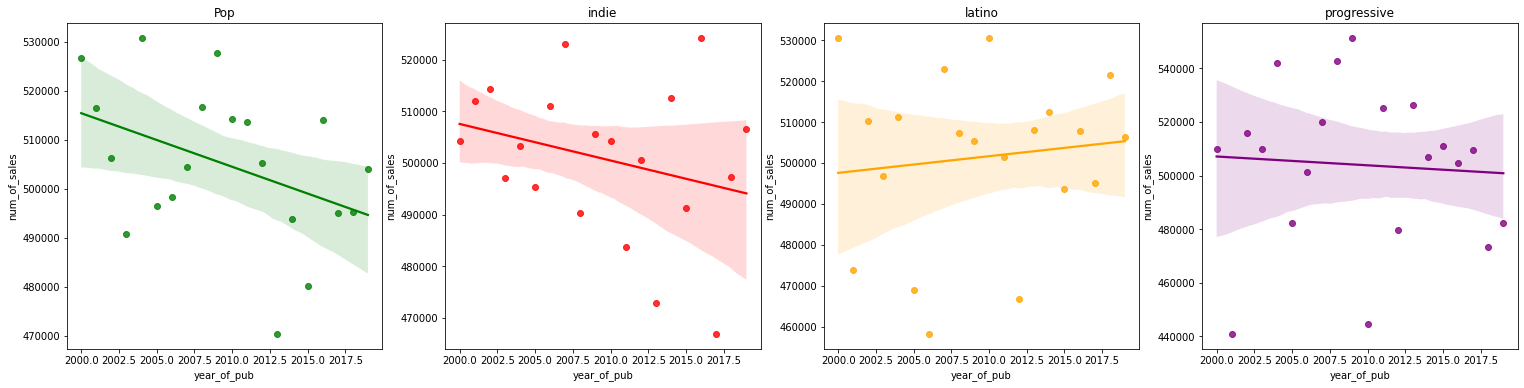

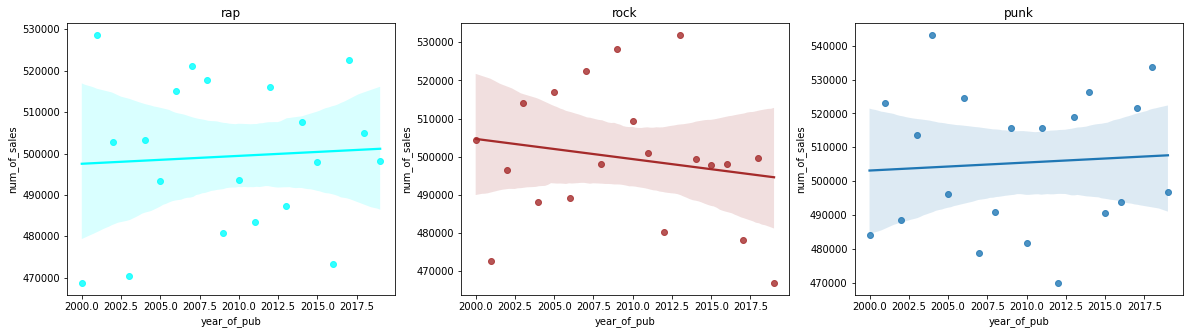

In [51]:
albums_pop = albums_df[albums_df['genre'] == 'Pop']
albums_indie = albums_df[albums_df['genre'] == 'Indie']
albums_latino = albums_df[albums_df['genre'] == 'Latino']
albums_progressive = albums_df[albums_df['genre'] == 'Progressive']
albums_rap = albums_df[albums_df['genre'] == 'Rap']
albums_rock = albums_df[albums_df['genre'] == 'Rock']
albums_punk = albums_df[albums_df['genre'] == 'Punk']


group_pop = albums_pop.groupby(['year_of_pub'])['num_of_sales'].mean().reset_index()
group_indie = albums_indie.groupby(['year_of_pub'])['num_of_sales'].mean().reset_index()
group_latino = albums_latino.groupby(['year_of_pub'])['num_of_sales'].mean().reset_index()
group_progressive = albums_progressive.groupby(['year_of_pub'])['num_of_sales'].mean().reset_index()
group_rap = albums_rap.groupby(['year_of_pub'])['num_of_sales'].mean().reset_index()
group_rock = albums_rock.groupby(['year_of_pub'])['num_of_sales'].mean().reset_index()
group_punk = albums_punk.groupby(['year_of_pub'])['num_of_sales'].mean().reset_index()


fig, axes = plt.subplots(1, 4, figsize=(26, 6))
fig1, axes1 = plt.subplots(1, 3, figsize=(20, 5))
sns.regplot(ax = axes[0],y = 'num_of_sales', x = 'year_of_pub', data = group_pop, color = 'g')
sns.regplot(ax = axes[1],y = 'num_of_sales', x = 'year_of_pub', data = group_indie, color = 'r')
sns.regplot(ax = axes[2],y = 'num_of_sales', x = 'year_of_pub', data = group_latino, color = 'orange')
sns.regplot(ax = axes[3],y = 'num_of_sales', x = 'year_of_pub', data = group_progressive, color = 'purple')
sns.regplot(ax = axes1[0],y = 'num_of_sales', x = 'year_of_pub', data = group_rap,color = 'cyan')
sns.regplot(ax = axes1[1],y = 'num_of_sales', x = 'year_of_pub', data = group_rock,color = 'brown')
sns.regplot(ax = axes1[2],y = 'num_of_sales', x = 'year_of_pub', data = group_punk)
ax = axes[0].set_title("Pop")
ax = axes[1].set_title("indie")
ax = axes[2].set_title("latino")
ax = axes[3].set_title("progressive")
ax = axes1[0].set_title("rap")
ax = axes1[1].set_title("rock")
ax = axes1[2].set_title("punk")

plt.show()

#### As you can see, the Pop genre have the smallest scattering between the sales infront of the years than the rest of the genres. Which tells us the pop genre is the most stable.

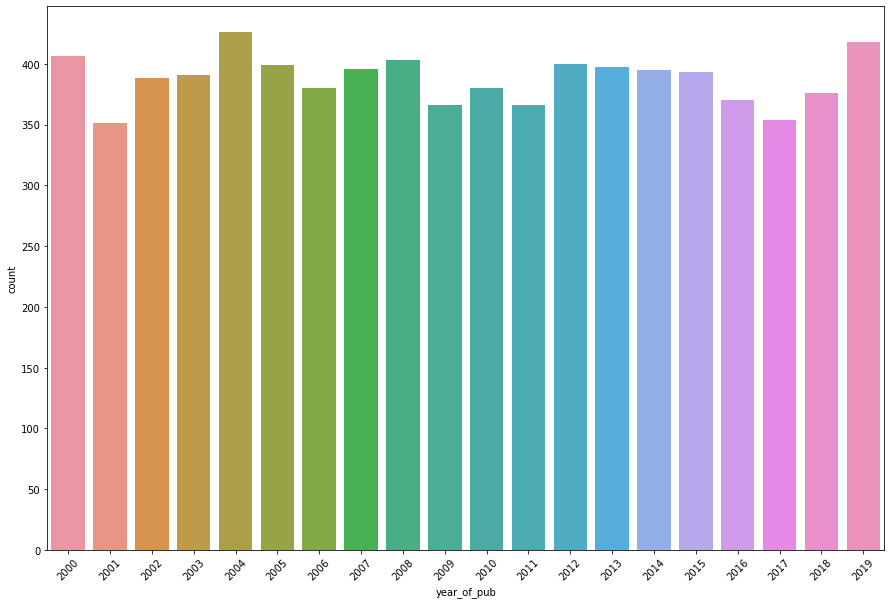

In [52]:
plt.figure(figsize=(15,10))
st = sns.countplot(x='year_of_pub', data=albums_pop)
st.tick_params(axis='x', rotation=45)

#### The histplot above prove our point. The pop genre is stable.
#### During the years there was not big different between the salles.

- 

#### Now we will see the connection between the sales of the genres:

In [22]:
group2 = albums_df.pivot_table(['num_of_sales'],'year_of_pub', 'genre').reset_index()

In [23]:
group2

year_of_pub   num_of_sales                                               \
genre                Alternative        Ambient    Black Metal          Blues   
0            2000  472034.144578  514739.860465  511043.365591  498347.958763   
1            2001  490155.376238  530381.482353  470005.945652  470006.340206   
2            2002  481658.864865  517504.464789  437288.434211  509535.623529   
3            2003  477680.233010  460017.058140  462220.595506  478274.808511   
4            2004  481759.306931  468219.575758  472836.585366  506642.565657   
5            2005  476537.000000  499311.377193  509459.478261  499746.873786   
6            2006  483439.829787  481089.021053  521816.902778  478186.180723   
7            2007  490171.333333  484583.402062  548414.669725  476422.333333   
8            2008  489572.329268  506609.548780  476424.274725  488766.122807   
9            2009  499305.962617  516277.809524  547927.120370  517332.817204   
10           2010  508605.894737  523967.180180  451117.508475  514997.418182   
11           2011  518417.476744  503511.270833  489865.136364  573403.486111   
12           2012  523495.396552  487919.871795  550723.443182  486848.634409   
13           2013  475462.126214  517686.752475  495768.032258  500218.153061   
14           2014  441784.670000  477748.884615  517646.330357  466706.284211   
15           2015  520623.693878  545611.578947  462237.666667  452175.635417   
16           2016  459933.367347  558034.368421  497240.934066  506348.538462   
17           2017  481628.653465  485932.565217  508184.631579  510467.117647   
18           2018  466496.489796  509274.329545  521382.715909  480951.684211   
19           2019  489616.298969  534630.398230  476861.646465  497572.000000   

                                                                   \
genre       Boy Band       Brit-Pop    Compilation        Country   
0      498007.450000  507509.305263  475738.260417  494373.558824   
1      507237.577320  535319.841584  507751.825688  493606.353535   
2      535915.050000  495919.512195  500197.073171  488795.038835   
3      460409.939759  553307.366337  484316.592920  446553.466019   
4      547218.423913  519191.397727  525508.842593  534325.308511   
5      481380.813953  529845.116279  527228.068966  472765.132653   
6      560112.662921  512562.903846  510401.030928  496975.861111   
7      540465.234783  505808.821429  544674.565217  506576.804348   
8      503092.565217  499156.968085  509019.035714  492313.648649   
9      445401.450549  468429.583333  499924.870000  480418.969072   
10     515622.545455  554212.988764  529391.422222  447134.343137   
11     526940.010638  500005.915789  522893.950617  529437.705357   
12     434106.797872  464746.680000  536000.148438  480826.555556   
13     544975.833333  498720.302752  456245.022989  442902.480769   
14     496590.157895  442838.000000  505745.763441  465339.917526   
15     526285.500000  485670.841584  468763.669903  488207.178947   
16     508363.693333  470801.802083  500040.551402  489614.774194   
17     509075.148936  530727.718750  476820.247706  488178.871287   
18     522389.519231  434012.009615  526656.666667  540027.273684   
19     535177.106796  509439.455556  483367.726415  528808.422680   

                      ...                                               \
genre          Dance  ...       Pop-Rock    Progressive           Punk   
0      491967.314433  ...  497446.095960  509754.000000  484166.454545   
1      511311.169903  ...  507214.000000  440856.598039  523134.756219   
2      477789.062201  ...  501404.494845  515778.321839  488511.756614   
3      438017.792350  ...  507970.346939  510047.720430  513654.313187   
4      496718.372093  ...  460606.239362  542078.255319  542986.808743   
5      472152.649682  ...  513241.658416  482186.478261  496201.183333   
6      483135.574359  ...  492973.728889  501271.402174  524678.782828   
7      484899.994681  ...  547160.7696

- Correlation:

In [24]:
corr1 = group2.iloc[10:30,10:30].corr()

<AxesSubplot:xlabel='None-genre', ylabel='None-genre'>

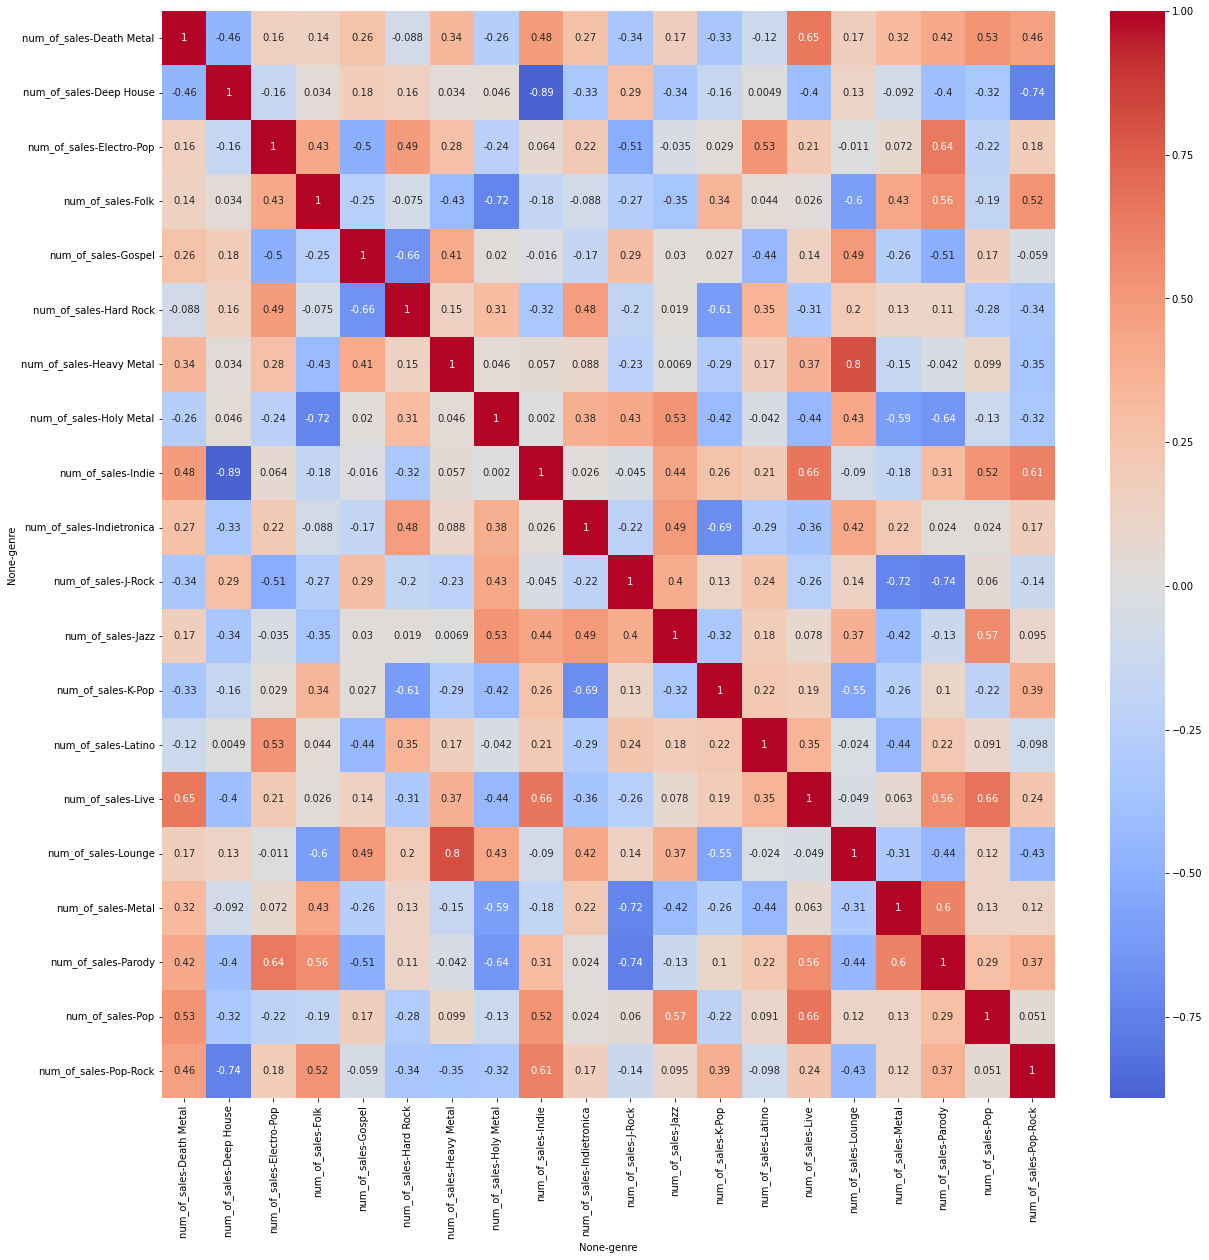

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(data = corr1, cmap = 'coolwarm', annot = True, center = 0)

#### From the 'heatmap' we assume that the sells in the pop genre, are not tie to the other genres.
#### On the other hand there is a connection between other sales of genres


### To conclusion:

## So... Which genre will you choose? 
#### We wanted to check in which genere we rather focus to assign an artist that will make us good profet.
#### This is our deductions:
- From the first tables we have learned that the channels not rating the genres base on the selling, what probably let us assume that they rating base on proffetional opinion.

- From the regplots we can see that the pop genre is the most stable genre of them all, and we also preform this point with countplot that shows the amount of selling is stay the same during the years.

- We done corralation between the geners and we find out that there is a connections between one genre to another, except the pop genre who is not in connection with any other genre.   what teaching us that even though a lot of the sales of the other genres has affected by the sales from others, The pop genre stay the same amount of sales

<img src = 'https://c.tenor.com/f6LI_IStx7EAAAAC/gavin-kid.gif' width="200"/>

#### drums.... drums... drums....
# the pop genre!!!